<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/ase3001_exercises_impact_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impact distribution

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jiwoo Choi (jiwoochoi@inha.edu) </div>_

<br>

---

<br>

<br>

In this problem, the objective is to simulate the trajectory of a free-flying rocket and estimate the dispersion of the impact point due to wind effects.

<br>

Let us consider the equations of motion for a free-flying rocket.

The dynamics of the state variables, which include the velocity (speed), $V$, the flight path angle in the vertical plane, $\gamma$, and the heading angle in the horizontal plane, $\psi$, are given as follows.

The vertical flight path angle, $\gamma$ is defined as 0 degrees when the rocket is flying horizontally, increasing as the rocket ascends, with a value of 90 degrees representing vertical ascent. The horizontal heading angle is defined as 0 degrees when flying to north, increasing as the rocket turns right, reaching 90 degrees when flying to east.

<br>

\begin{align*}
  m\dot{V} &= D_x - mg\sin\gamma \\
  mV\dot{\gamma} &= -D_z -mg\cos\gamma \\
  mV\dot{\psi} &= D_y \\
\end{align*}

<center>
<img src="https://jonghank.github.io/ase3001/files/frame.png" width="600">
</center>

<br>

Here, $m$ represents the mass of the rocket, and the drag force $D = (D_x, D_y, D_z) \in \mathbb{R}^3$ consists of three components: 1) $D_x$, the drag component along the direction of the velocity vector, 2) $D_y$, the horizontal drag component perpendicular to the velocity vector and to the right, and 3) $D_z$, the vertical drag component perpendicular to the velocity vector and acting downward.
In general, a free-flying rocket is assumed to be statically stable, meaning the angle of attack remains 0 degrees at all times, allowing us to assume that no lift is generated.

The position of the rocket, relative to the launch point, is expressed as $p = (p_n, p_e, h) \in \mathbb{R}^3$, where $p_n$ represents the position in the northward ($N$) direction, $p_e$ represents the displacement in the eastward ($E$) direction, and $h$ represents the altitude ($H$). Note that the altitude ($H$) is in the opposite direction of the downward ($D$) direction, where gravity acts.

The rate of the position variables $p_n$, $p_e$, and $h$ is described by the following dynamics, where the right-hand sides can be interpreted as the $NEH$ components of the velocity vector, $v_n$ (northward velocity), $v_e$ (eastward velocity), and $\dot{h} = -v_d$(velocity in the altitude direction), expressed in terms of the state variables $V$, $\gamma$, and $\psi$.

<br>

\begin{align*}
  \dot{p}_n &= v_n = V\cos\gamma\cos\psi \\
  \dot{p}_e &= v_e = V\cos\gamma\sin\psi \\
  \dot{h} &= - v_d = V\sin\gamma
\end{align*}

<br>

The dynamics of the rocket’s trajectory can be expressed using the six state variables described above. With these six variables, the full equations of motion can be formulated. Once the drag components $D = (D_x, D_y, D_z)$, acting in the direction of motion and perpendicular directions, are provided at each moment, the time derivatives of the six state variables can be computed. These time derivatives can then be integrated over time to simulate the rocket’s trajectory.


<br>

Now, let us examine how the drag force is determined. The magnitude of the drag force is proportional to the dynamic pressure, which is modeled as being proportional to the atmospheric density (a function of altitude) and the square of the rocket’s relative velocity with respect to the wind. The direction of the drag force is opposite to the relative velocity to the wind. The parameters $C_d$ and $S$ represent the drag coefficient and the cross-sectional area of the rocket, respectively, and are assumed to be constant.

Combining these factors, the drag components in the North-East-Down (NED) coordinate system, $D_{ned} = (D_n, D_e, D_d)$, can be computed as follows:

<br>

\begin{align*}
  D_{ned} = \bmat{D_n \\ D_e \\ D_d} &=
  \overbrace{\overbrace{\frac{1}{2}\rho \|v_\text{rel} \|^2}^{\text{Dynamic pressure}}SC_D}^{\text{Magnitude of drag}}
  \overbrace{\left(-\frac{v_\text{rel}}{\|v_\text{rel} \|}\right)}^{\text{Direction of drag}} \\
  &= -\frac{1}{2}\rho SC_D \|v_\text{rel} \| v_\text{rel}
\end{align*}

<br>

The atmospheric density $\rho$ can be modeled as a function of altitude $h$ as follows, where the density is in $\text{kg/m}^3$, and the altitude is in $\text{m}$:

<br>

$$
\rho(h) = \rho_0 \exp\left(-\frac{h}{H_s}\right)
$$

<br>

where:

-	$\rho_0$ is the atmospheric density at sea level (approximately $1.225 \text{kg/m}^3$),
-	$H_s$ is the scale height, which is typically around $8,500 \text{m}$ in the Earth’s atmosphere,
-	$h$ is the altitude in meters.

This exponential model accounts for the decrease in atmospheric density with increasing altitude.

<br>

The relative velocity of the rocket with respect to the wind, $v_{\text{rel}} \in \mathbb{R}^3$, can be expressed in the North-East-Down (NED) coordinate system as follows:

<br>

\begin{align*}
  v_\text{rel} &= v_{ned}- v_{w} \\
  &= \bmat{V\cos\gamma\cos\psi \\ V\cos\gamma\sin\psi \\ -V\sin\gamma} - \bmat{v_{w,n} \\ v_{w,e} \\ v_{w,d}}
\end{align*}

<br>

The drag components in the NED coordinate system, $D_{ned} = (D_n, D_e, D_d)$, can be transformed into the XYZ coordinate system which aligns with the velocity vector, yielding the XYZ drag components $D_{xyz} = (D_x, D_y, D_z)$. This transformation is performed using a rotation matrix that converts the NED frame into the XYZ frame based on the flight path angle $\gamma$ and heading angle $\psi$.

<br>

\begin{align*}
  D_{xyz} = \bmat{D_x \\ D_y \\ D_z} = \bmat{\cos\gamma\cos\psi & \cos\gamma\sin\psi & -\sin\gamma \\
  -\sin\psi & \cos\psi & 0 \\  
  \sin\gamma\cos\psi & \sin\gamma\sin\psi & \cos\gamma } D_{ned}
\end{align*}

<br>

<br>

The simulation parameters are defined as follows.

-	$m$: Mass of the rocket ($=40\,\text{kg}$)
-	$d$: Diameter of the rocket ($=0.16\,\text{m}$)
-	$S$: Cross-sectional area of the rocket ($=\frac{\pi d^2}{4}$)
-	$C_d$: Drag coefficient of the rocket ($=0.2$)
- $g$: Gravitational acceleration ($=9.8\,\text{m/s}^2$)

These constants are used to calculate drag forces and the overall dynamics of the rocket throughout its trajectory.



In [90]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
m = 40               # mass
S = np.pi*0.08**2    # cross-section area
Cd = 0.2             # drag coefficient
g = 9.8              # gravitational acceleration

# unit conversion
Rad2Deg = 180/np.pi  # conversion: radian to degree
Deg2Rad = 1/Rad2Deg  # conversion: degree to radian

<br>

---

<br>

_**(Problem 1)**_
In this problem, we aim to compute and visualize the 3D trajectory of a rocket under the assumption that there is no wind ($v_{w} = 0$).

The trajectory will be integrated using numerical methods. One can perform the numerical integration using methods such as the Adams-Bashforth technique or alternatively by leveraging functions provided in libraries like `scipy`.

The goal is to numerically integrate the equations of motion and plot the 3D trajectory of the rocket based on the dynamics described earlier. The absence of wind simplifies the drag calculations, allowing us to focus on the effects of the rocket’s motion and aerodynamic drag in a wind-free environment.


<br>

_**(Problem 1a)**_
Let the state vector z of the system be defined as:

$$
z = \begin{bmatrix} V & \gamma & \psi & p_n & p_e & h \end{bmatrix}^T
$$

and use the equations of motion without considering the wind, to define a function `state_derivative` that calculates the time derivatives $\dot{z}_t$ based on the current state variable $z_t$.

In [91]:
def state_derivative(z):
  V, gamma, psi, pn, pe, h = z
  def calc__density(h):
    '''H = 8500미터'''
    H = 8500
    return 1.225 * np.exp(-h/H)

  def calc__v_rel(V,gamma,psi):
    '''v_rel을 구하는 코드'''
    return np.array([V*np.cos(gamma)*np.cos(psi),V*np.cos(gamma)*np.sin(psi),-V*np.sin(gamma)])

  v_rel = calc__v_rel(V,gamma,psi)
  density = calc__density(h)
  def calc__D(v_rel,density):
    '''D_ned을 구하는 코드'''
    return -0.5*density * np.linalg.norm(v_rel) * S * Cd * v_rel
  D_ned = calc__D(v_rel,density)
  def transform__D(D_ned,gamma,psi):
    '''D_xyz을 변환하는 코드'''
    transform_matrix = np.array([[np.cos(gamma)*np.cos(psi),np.cos(gamma)*np.sin(psi),-np.sin(gamma)],
                    [-np.sin(psi),np.cos(psi),0],
                    [np.sin(gamma)*np.cos(psi),np.sin(gamma)*np.sin(psi),np.cos(gamma)]])
    D_xyz = transform_matrix @ D_ned
    if np.shape(D_xyz) == np.shape(D_ned):
      return D_xyz
    else:
      raise ValueError

  D_xyz=transform__D(D_ned,gamma,psi)
  D_x = D_xyz[0]
  D_y = D_xyz[1]
  D_z = D_xyz[2]
  def calc__V_dot(D_x,gamma):
    V_dot = (D_x /m) - g* np.sin(gamma)
    return V_dot
  V_dot = calc__V_dot(D_x,gamma)
  def calc__gamma_dot(D_z,gamma,V):
    gamma_dot = (-D_z / (m*V)) - ((g*np.cos(gamma))/V)
    return gamma_dot
  gamma_dot = calc__gamma_dot(D_z,gamma,V)
  def calc__psi_dot(D_y,V):
    return D_y / (m*V)
  psi_dot = calc__psi_dot(D_y,V)
  def calc__pn_dot(V,gamma,psi):
    return V*np.cos(gamma) * np.cos(psi)
  pn_dot = calc__pn_dot(V,gamma,psi)
  def calc__pe_dot(V,gamma,psi):
    return V*np.cos(gamma) * np.sin(psi)
  pe_dot = calc__pe_dot(V,gamma,psi)
  def calc__h_dot(V,gamma):
    return V*np.sin(gamma)
  h_dot = calc__h_dot(V,gamma)
  return np.array([V_dot, gamma_dot, psi_dot, pn_dot, pe_dot, h_dot])

<br>

_**(Problem 1b)**_
Using the model described above, perform numerical integration of the dynamics of a free-flying rocket launched to east with an initial flight path angle of 40 degrees and an initial velocity of 1 km/s.

Compute and plot the rocket’s altitude-range trajectory plot (altitude in the vertical axis and range in the horizontal axis with range implying the horizontal distance traveled in the launch direction). The numerical integration should be performed using the provided parameters, starting from launch and continuing until the rocket impacts the ground.

In [61]:
# integration parameters
tf = 200                  # final time
dt = 0.1                  # step size
t = np.arange(0, tf, dt)  # time (tentative)
N = len(t)                # number of time steps

# initial conditions
V = 1000.0                # velocity
gamma = 40*Deg2Rad        # flight path angle
psi = 90*Deg2Rad          # heading
pn, pe, h = np.zeros(3)   # position
init = [V, gamma, psi, pn, pe, h]

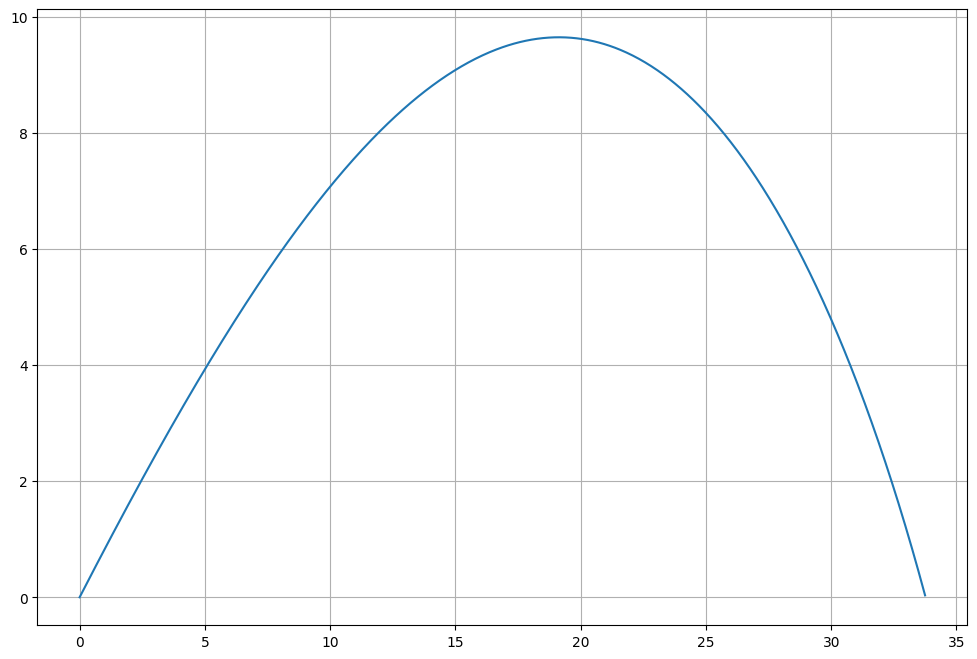

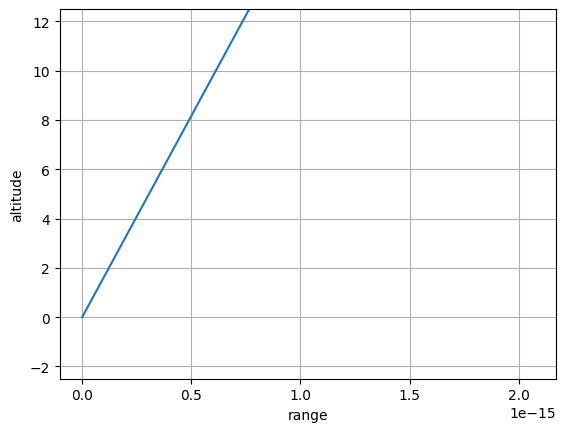

In [62]:
import scipy.integrate as spi
v_w = 0




def model(z,t):
  return state_derivative(z)

state = spi.odeint(model,init,t)

state = state[state[:,5]>=0]
plt.figure(figsize = [12,8])
plt.plot(state[:,4]/1000,state[:,5]/1000)
plt.grid()
plt.show()
plt.plot(state[:,3]/1000,state[:,4]/1000)
plt.grid()
plt.xlabel("range")
plt.ylabel("altitude")
plt.ylim([-2.5,12.5])
plt.show()

In [52]:
len(state)

882

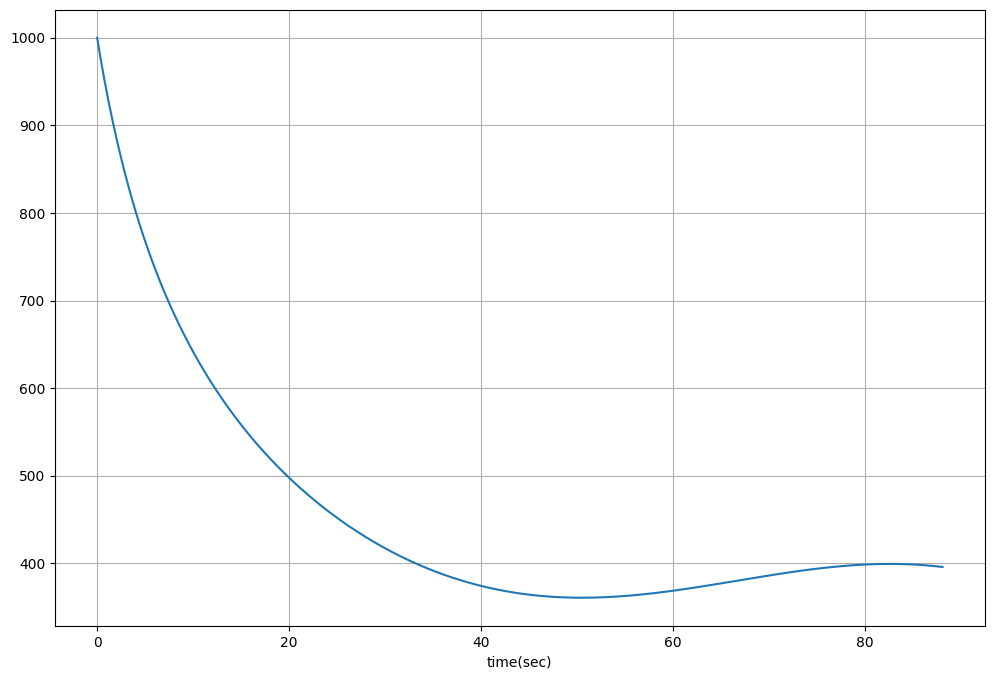

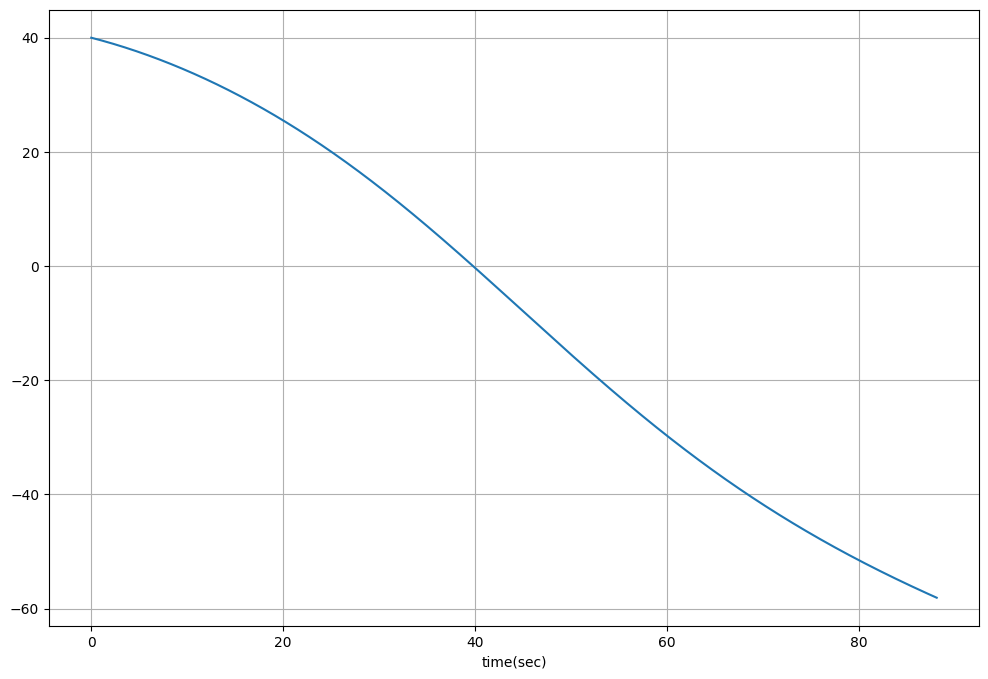

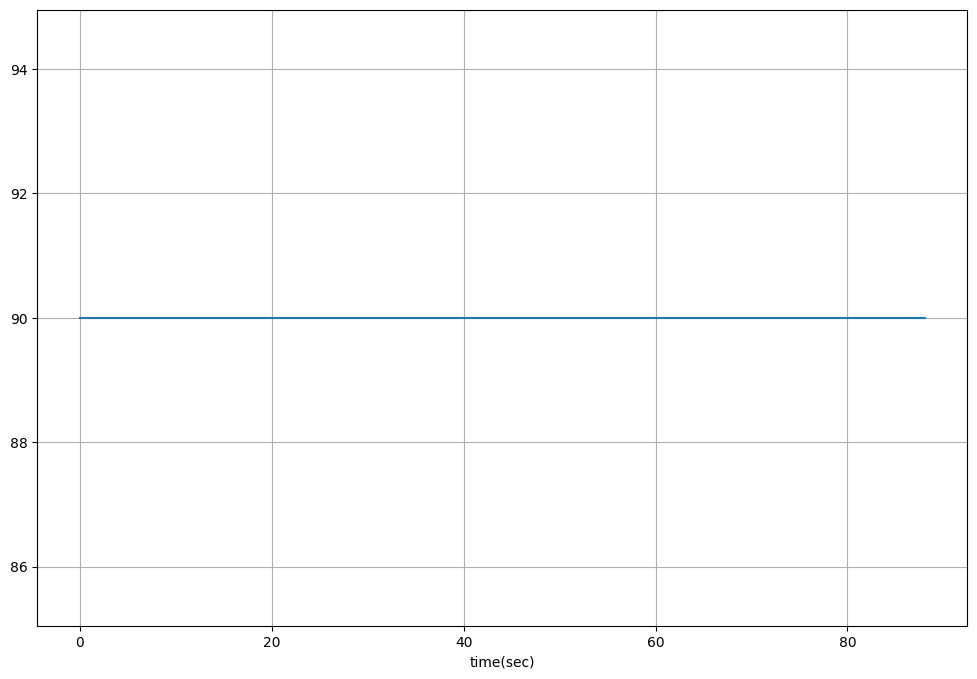

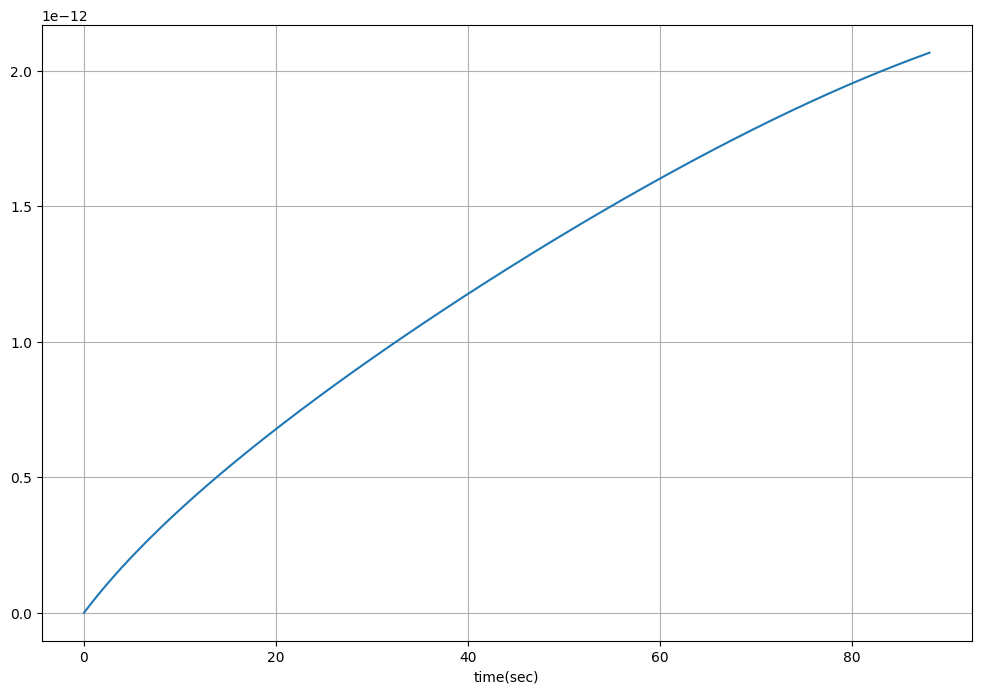

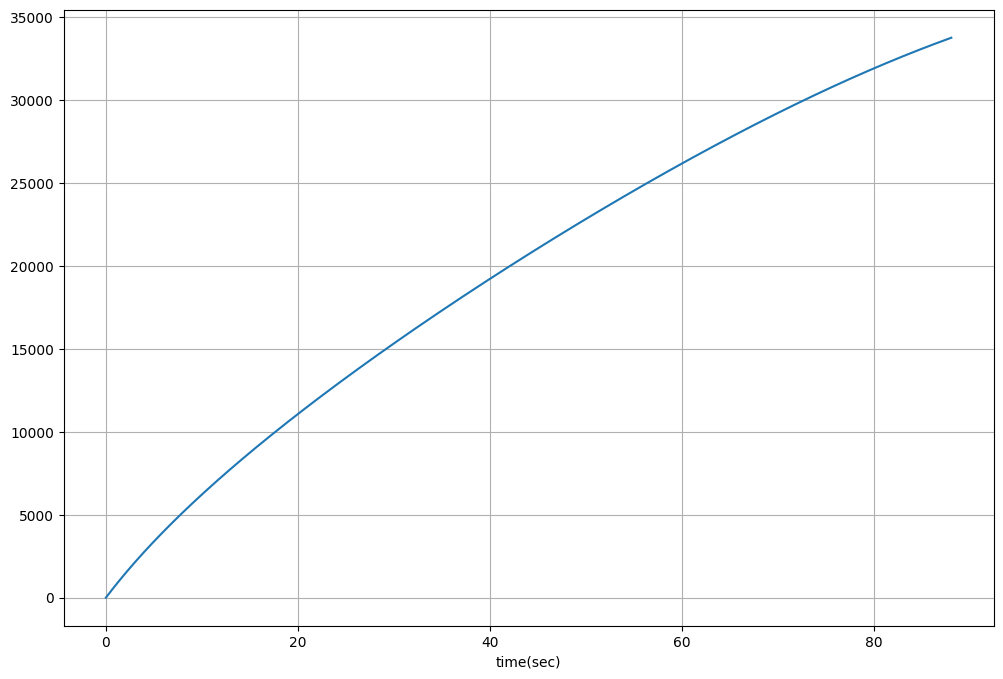

In [63]:
##################
# your code here #

for i in range(5):

  plt.figure(figsize = [12,8])
  if i == 1 or i == 2:
    plt.plot(t[:len(state)],np.rad2deg(state[:,i]))
  else:
    plt.plot(t[:len(state)],state[:,i])
  plt.grid()
  plt.xlabel("time(sec)")
  plt.show()


# your code here #
##################

<br>

_**(Problem 1c)**_
Plot the state variables over time using the provided model. Additionally, print out the rocket’s velocity, flight path angle, and flight range (distance traveled) at the moment when it impacts the ground.

Velocity: 395.69 m/s
Flight path angle: -58.16 deg
Flight range: 33.77 km


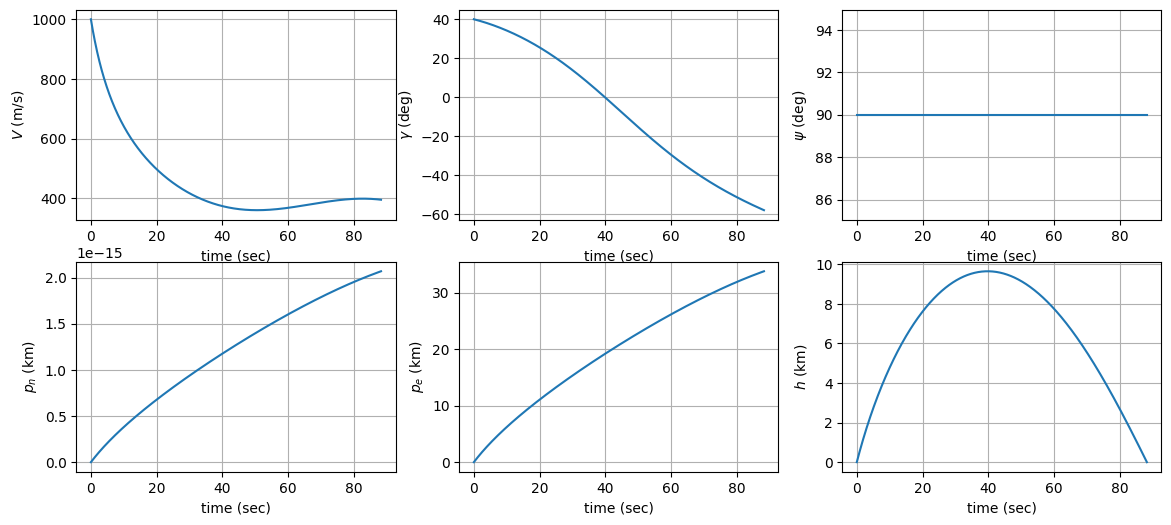

In [ ]:
##################
# your code here #



# your code here #
##################

<br>

---

<br>

_**(Problem 2)**_
Perform a Monte Carlo simulation to compute the trajectory of a rocket considering the effects of wind. The following assumptions are made:
    
- Wind is assumed to blow only horizontally, meaning there is no vertical component in the $h$- or $d$-direction. In the NED coordinate system, the wind velocity is expressed as $v_w = (v_{w,n}, v_{w,e}, 0)$.

    * At the initial time step $k = 0$, the wind velocity components $v_{w,n}$ and $v_{w,e}$ follow a normal distribution with a mean of $0$ and a standard deviation of $5$. The vertical wind velocity component $v_{w,d} = 0$ is set to $0$ for all simulations.
    * A random walk is applied to simulate wind speed changes at each time step $k$. The wind velocities are updated as follows, where $r_n$ and $r_e$ are random variables generated independently at each step, both following a normal distribution with a mean of $0$ and a standard deviation of $1$.

\begin{align*}
  v_{w,n}(t) &= v_{w,n}(t-\Delta t) + r_{n}(t) \\
  v_{w,e}(t) &= v_{w,e}(t-\Delta t) + r_{e}(t)
\end{align*}



<br>

_**(Problem 2a)**_
Using the same definition of state variables as in the previous problem, define the function `state_derivative` that computes the time derivatives of the state variables $\dot{z}_t$ considering the wind effects. The function should take the current state $z_t$ and wind velocity $v_w$ as inputs. You may reuse most of the `state_derivative` function defined in Problem 1, but clearly indicate the modified parts to account for the wind.

In [92]:
def state_derivative(z,v_w):
  V, gamma, psi, pn, pe, h = z
  def calc__density(h):
    '''H = 8500미터'''
    H = 8500
    return 1.225 * np.exp(-h/H)



  def calc__v_rel(V,gamma,psi):
    '''v_rel을 구하는 코드'''
    return np.array([V*np.cos(gamma)*np.cos(psi),V*np.cos(gamma)*np.sin(psi),-V*np.sin(gamma)]) +v_w

  v_rel = calc__v_rel(V,gamma,psi)
  density = calc__density(h)
  def calc__D(v_rel,density):
    '''D_ned을 구하는 코드'''
    return -0.5*density * np.linalg.norm(v_rel) * S * Cd * v_rel
  D_ned = calc__D(v_rel,density)
  def transform__D(D_ned,gamma,psi):
    '''D_xyz을 변환하는 코드'''
    transform_matrix = np.array([[np.cos(gamma)*np.cos(psi),np.cos(gamma)*np.sin(psi),-np.sin(gamma)],
                    [-np.sin(psi),np.cos(psi),0],
                    [np.sin(gamma)*np.cos(psi),np.sin(gamma)*np.sin(psi),np.cos(gamma)]])
    D_xyz = transform_matrix @ D_ned
    if np.shape(D_xyz) == np.shape(D_ned):
      return D_xyz
    else:
      raise ValueError

  D_xyz=transform__D(D_ned,gamma,psi)
  D_x = D_xyz[0]
  D_y = D_xyz[1]
  D_z = D_xyz[2]
  def calc__V_dot(D_x,gamma):
    V_dot = (D_x /m) - g* np.sin(gamma)
    return V_dot
  V_dot = calc__V_dot(D_x,gamma)
  def calc__gamma_dot(D_z,gamma,V):
    gamma_dot = (-D_z / (m*V)) - ((g*np.cos(gamma))/V)
    return gamma_dot
  gamma_dot = calc__gamma_dot(D_z,gamma,V)
  def calc__psi_dot(D_y,V):
    return D_y / (m*V)
  psi_dot = calc__psi_dot(D_y,V)
  def calc__pn_dot(V,gamma,psi):
    return V*np.cos(gamma) * np.cos(psi)
  pn_dot = calc__pn_dot(V,gamma,psi)
  def calc__pe_dot(V,gamma,psi):
    return V*np.cos(gamma) * np.sin(psi)
  pe_dot = calc__pe_dot(V,gamma,psi)
  def calc__h_dot(V,gamma):
    return V*np.sin(gamma)
  h_dot = calc__h_dot(V,gamma)
  return np.array([V_dot, gamma_dot, psi_dot, pn_dot, pe_dot, h_dot])




In [93]:
states = np.zeros([N,6])

Current iteration: 1/2000
Current iteration: 2/2000
Current iteration: 3/2000
Current iteration: 4/2000
Current iteration: 5/2000
Current iteration: 6/2000
Current iteration: 7/2000
Current iteration: 8/2000
Current iteration: 9/2000
Current iteration: 10/2000
Current iteration: 11/2000
Current iteration: 12/2000
Current iteration: 13/2000
Current iteration: 14/2000
Current iteration: 15/2000
Current iteration: 16/2000
Current iteration: 17/2000
Current iteration: 18/2000
Current iteration: 19/2000
Current iteration: 20/2000
Current iteration: 21/2000
Current iteration: 22/2000
Current iteration: 23/2000
Current iteration: 24/2000
Current iteration: 25/2000
Current iteration: 26/2000
Current iteration: 27/2000
Current iteration: 28/2000
Current iteration: 29/2000
Current iteration: 30/2000
Current iteration: 31/2000
Current iteration: 32/2000
Current iteration: 33/2000
Current iteration: 34/2000
Current iteration: 35/2000
Current iteration: 36/2000
Current iteration: 37/2000
Current it

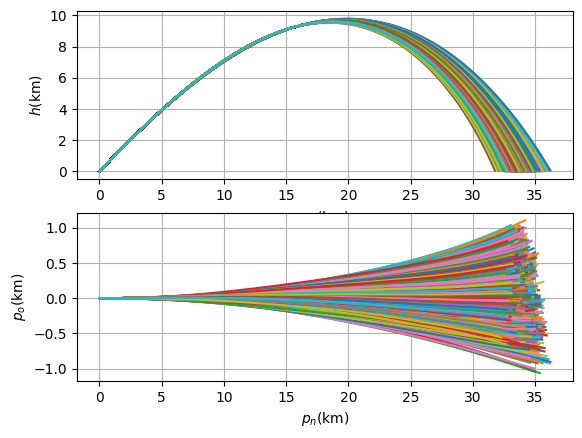

In [194]:
# integration parameters

def simu_sole(n):
  tf = 200                  # final time
  dt = 0.1                  # step size
  t = np.arange(0, tf, dt)  # time (tentative)
  N = len(t)                # number of time steps

  # initial conditions
  V = 1000.0                # velocity
  gamma = 40*Deg2Rad        # flight path angle
  psi = 90*Deg2Rad          # heading
  pn, pe, h = np.zeros(3)   # position
  init = [V, gamma, psi, pn, pe, h]

  states[0,:] = init
  np.random.seed(n)
  v_w =np.random.normal(0,5,3)
  v_w[2] = 0
  #print(v_w)
  deriv_p = state_derivative(states[0,:],v_w)
  last_k = 0

  for k in range(N-1):
    np.random.seed(n+k)
    v_w = v_w +np.random.normal(0,1,3)
    v_w[2] = 0
    #print(v_w)
    deriv = state_derivative(states[k,:],v_w)
    states[k+1,:] = states[k,:] + 0.5*dt*(3*deriv - deriv_p)
    if states[k+1,5] < 0:
      last_k = k

      break
    deriv_p = deriv
  return states,last_k


results = []

n_mc = 2000             # number of Monte-Carlo runs
from IPython.display import clear_output
for i in range(n_mc):
  states,last_k= simu_sole(i)

  print(f'Current iteration: {i+1}/{n_mc}')
  plt.subplot(2,1,1)
  plt.plot(states[:last_k,4]/1000,states[:last_k,5]/1000)
  plt.xlabel('$p_e$(km)')
  plt.ylabel('$h$(km)')
  plt.grid(True)
  plt.subplot(2,1,2)
  plt.plot(states[:last_k,4]/1000,states[:last_k,3]/1000)
  results.append([states[last_k,4]/1000,states[last_k,3]/1000])
  plt.xlabel('$p_n$(km)')
  plt.ylabel('$p_o$(km)')
  plt.grid(True)
    # 그래프 그리기
plt.show()

In [195]:

np_results = np.zeros([len(results),2])
print(results)
for i in range(len(results)):
  np_results[i,:] = results[i]
display(np_results)

[[33.16807167525448, -0.48082908080141423], [33.53007157701696, -0.38884979807680514], [33.29654872425314, 0.05378096706061624], [33.11565098000906, -0.3750886778737455], [33.1422399079978, 0.017235197626902735], [33.453133032168054, -0.053674682247483244], [33.05807914883069, 0.10301952549949846], [33.51697898815269, -0.2828737370235167], [32.95781897071368, 0.07958659203443395], [33.498706630848574, 0.10121591422980684], [33.14340015240553, -0.1480966778540399], [33.52179593565301, -0.1753719775661709], [33.626777728165976, 0.13048815665334013], [33.09127264674384, 0.3699211464237422], [33.370007291624354, -0.07886607983426339], [33.291467391479216, 0.32947128654274604], [33.9385378731309, 0.23768297018274723], [33.94325891766801, 0.21591004749926068], [32.45522754672272, 0.2612324930921743], [33.4653718390018, 0.2417068401511283], [33.25424500862839, 0.12661423353582327], [33.36080392231195, 0.33655182524820104], [33.81698417139279, 0.34508038007932057], [33.21562750053451, 0.199682

array([[33.16807168, -0.48082908],
       [33.53007158, -0.3888498 ],
       [33.29654872,  0.05378097],
       ...,
       [32.84144703, -0.47052726],
       [32.71581221, -0.65954426],
       [32.63010897, -0.25615599]])

<br>

_**(Problem 2b)**_
Perform a Monte Carlo simulation with 2000 iterations, each accounting for random wind effects, to simulate the rocket’s trajectory. Overlap all 2000 trajectories on a single plot.

In [176]:
# integration parameters
tf = 200                  # final time
dt = 0.1                  # step size
t = np.arange(0, tf, dt)  # time (tentative)
N = len(t)                # number of time steps

# initial conditions
V = 1000.0                # velocity
gamma = 40*Deg2Rad        # flight path angle
psi = 90*Deg2Rad          # heading
pn, pe, h = np.zeros(3)   # position
init = [V, gamma, psi, pn, pe, h]

# Monte-Carlo simulation parameter
n_mc = 2000               # number of Monte-Carlo runs


   100   200   300   400   500   600   700   800   900  1000
  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000

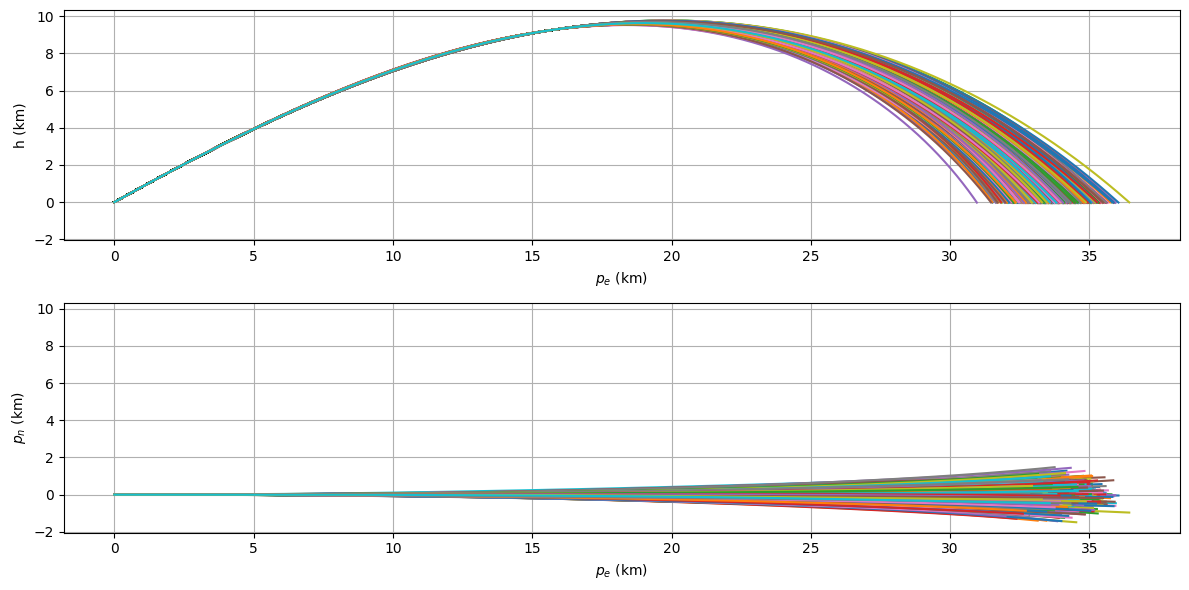

In [ ]:
##################
# your code here #



# your code here #
##################

<br>

_**(Problem 2c)**_
Using the results of the 2000 Monte Carlo simulations, plot the impact points on the North-East (NE) plane using the `scatter` function from the `matplotlib.pyplot` module. Additionally, plot the mean impact point on the same plane.

The accuracy of a rocket’s impact is typically expressed using the Circular Error Probable (CEP). The CEP is defined as the radius of a circle, centered at the mean impact point, within which 50% of the impacts will occur. For example, if a rocket has a CEP of 200 meters, approximately 50 out of 100 launches will land within a 200-meter radius from the mean impact point.

Based on the Monte-Carlo simulation results, estimate the CEP for this rocket.

CEP : 0.6560982160077478


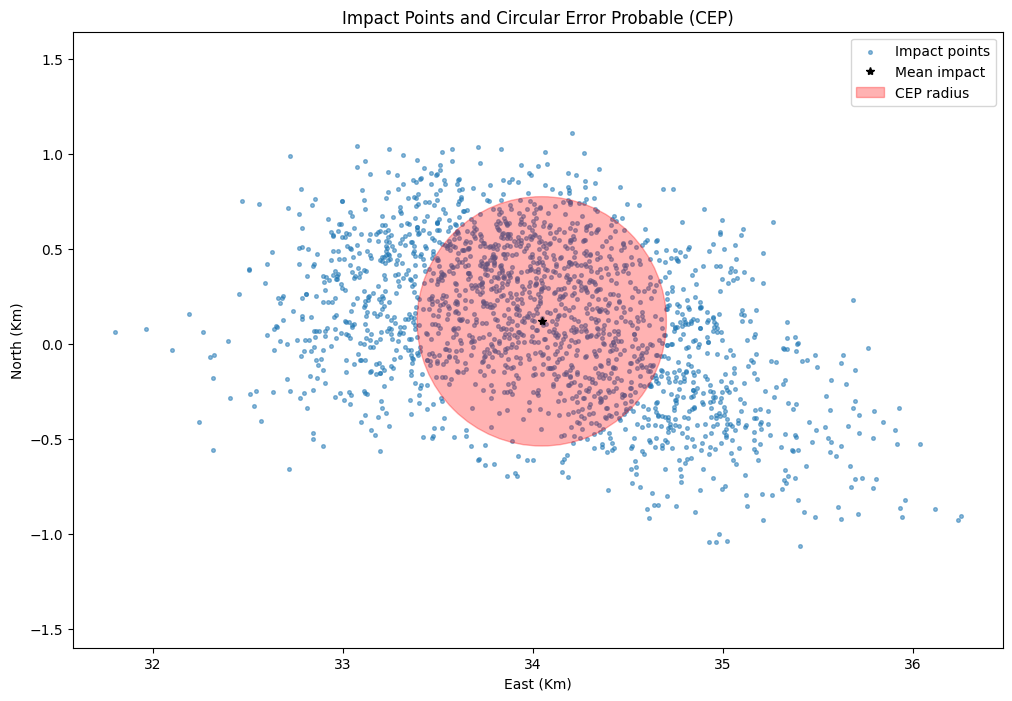

In [216]:
plt.figure(figsize=[12, 8])

# scatter plot으로 임팩트 포인트 표시
plt.scatter(np_results[:, 0], np_results[:, 1], s=7, alpha=0.5, label="Impact points")

# 평균 임팩트 포인트 표시
plt.plot(np.mean(np_results[:, 0]), np.mean(np_results[:, 1]), "*", color="black", label="Mean impact")

# CEP 계산 함수
def compute_cep(np_results):
    mean_x = np.mean(np_results[:, 0])
    mean_y = np.mean(np_results[:, 1])
    mean_x_y = np.array([mean_x, mean_y])
    R = np.zeros(len(np_results))
    for i in range(len(np_results)):
        R[i] = np.linalg.norm(mean_x_y - np_results[i, :])
    R = sorted(R)
    return R

# CEP 계산 및 표시
r_cep = compute_cep(np_results)[len(np_results)//2]  # 예시로 1000번째 값 선택
print(f"CEP : {r_cep}")

# 원의 중심을 평균 임팩트 포인트로 설정
circle_center = np.array([np.mean(np_results[:, 0]), np.mean(np_results[:, 1])])

# 투명도가 있는 빨간색으로 채워진 원 생성
circle = plt.Circle(circle_center, r_cep, color='r', alpha=0.3, fill=True, label="CEP radius")

# 현재 Axes에 원 추가
plt.gca().add_artist(circle)

# 축 간격을 동일하게 맞춤
plt.axis('equal')

# 범례와 축 표시
plt.legend()
plt.xlabel('East (Km)')
plt.ylabel('North (Km)')
plt.title('Impact Points and Circular Error Probable (CEP)')

# 그래프 표시
plt.show()

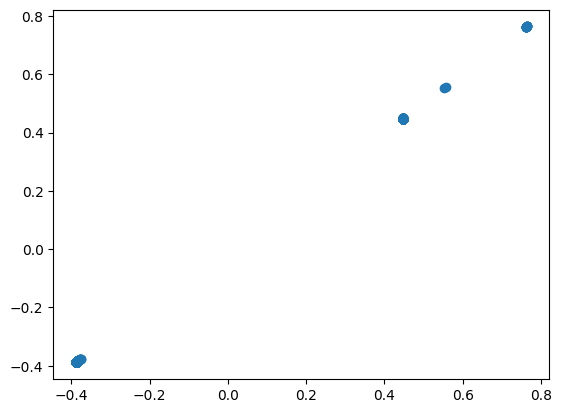

In [151]:
plt.scatter(np_results[:,3]/1000,np_results[:,3]/1000)

CEP: 0.70 km


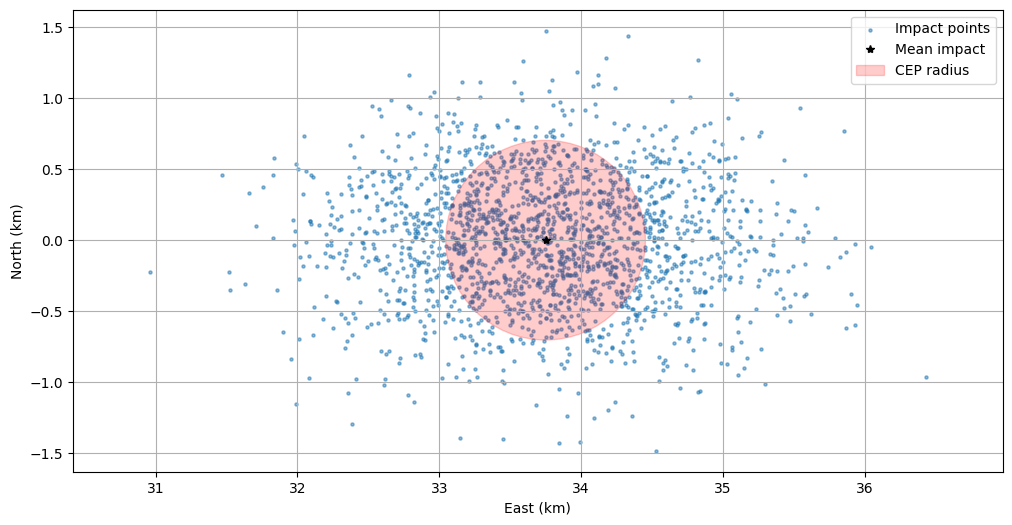

In [ ]:
##################
# your code here #



# your code here #
##################